In [ ]:
'''
1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations 
and select the best model using R or Python.
'''
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
upload=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [18]:
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [23]:
data.columns=data.columns.str.lower()
data.columns=data.columns.str.replace(' ','_')

In [24]:
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


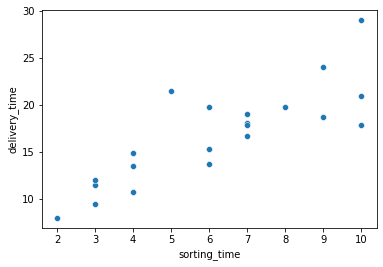

In [26]:
import seaborn as sns
sns.scatterplot(x='sorting_time',y='delivery_time',data=data)


In [27]:
data.corr()
#from graph and corr we get that there is strong correlation between sorting time and delivery time

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [28]:
#creating Model 
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data).fit()

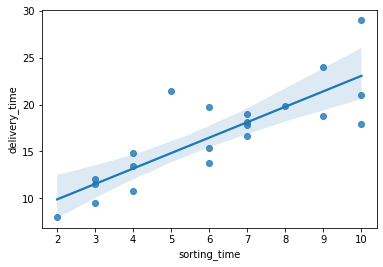

In [29]:
sns.regplot(x="sorting_time",y="delivery_time",data=data)

In [30]:
# y = mx + c  c=intercept, m=slope
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [34]:
#testing model
data['predicted']=model.fittedvalues
data

,delivery_time,sorting_time,predicted
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [40]:
#testing model for sorting time 7
#y=mx+c  c=6.582734 m=1.649020
prediction=1.649020*7 +(6.582734)
prediction

18.125874

In [48]:
#from model
print(data['predicted'][data['sorting_time']==7])

6     18.125873
12    18.125873
17    18.125873
19    18.125873
Name: predicted, dtype: float64


In [ ]:
'''
2) Salary_hike -> Build a prediction model for Salary_hike

'''

In [49]:
upload=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [51]:
salary=pd.read_csv("Salary_Data.csv")
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [52]:
salary.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [56]:
salary=salary.rename({'YearsExperience':'yearsExperience','Salary':'salary'},axis=1)

In [59]:
salary.corr()

,yearsExperience,salary
yearsExperience,1.000000,0.978242
salary,0.978242,1.000000


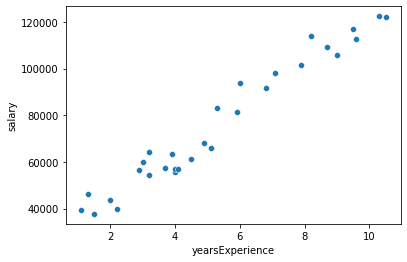

In [62]:
sns.scatterplot(x='yearsExperience',y='salary',data=salary)

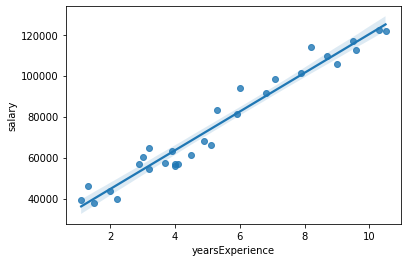

In [63]:
#from scatterplot and corr we can say yearsExperince and salary are highly correlated
#creating model
model=smf.ols("salary~yearsExperience",data=salary).fit()
sns.regplot(x="yearsExperience",y="salary",data=salary)

In [64]:
salary['predicted']=model.fittedvalues
salary[0:5]

,yearsExperience,salary,predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
